In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# %matplotlib inline

df = pd.read_csv("data/diabetes.csv")
df.shape

(768, 9)

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
df["Pregnancies_high"] = df["Pregnancies"] > 6
df[["Pregnancies", "Pregnancies_high"]].head()

,Pregnancies,Pregnancies_high
0,6,False
1,1,False
2,8,True
3,1,False
4,0,False


In [9]:
split_count = int(df.shape[0] * 0.8)
split_count

614

In [10]:
train = df[:split_count].copy()
train.shape

(614, 10)

In [11]:
test = df[split_count:].copy()
test.shape

(154, 10)

In [12]:
feature_names = train.columns.tolist()
feature_names.remove("Pregnancies")
feature_names.remove("Outcome")
feature_names

['Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Pregnancies_high']

In [13]:
label_name = 'Outcome' #분류하고싶은 답안
label_name

'Outcome'

In [14]:
X_train = train[feature_names]
print(X_train.shape)
X_train.head()

(614, 8)


,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Pregnancies_high
0,148,72,35,0,33.6,0.627,50,False
1,85,66,29,0,26.6,0.351,31,False
2,183,64,0,0,23.3,0.672,32,True
3,89,66,23,94,28.1,0.167,21,False
4,137,40,35,168,43.1,2.288,33,False


In [19]:
y_train = train[label_name]
print(y_train.shape)
y_train.head()

(614,)


0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [16]:
test = df[split_count:].copy()
test.shape

(154, 10)

In [17]:
X_test = test[feature_names]
y_test = test[label_name]

In [20]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model

model.fit(X_train, y_train)

DecisionTreeClassifier()

<Axes: >

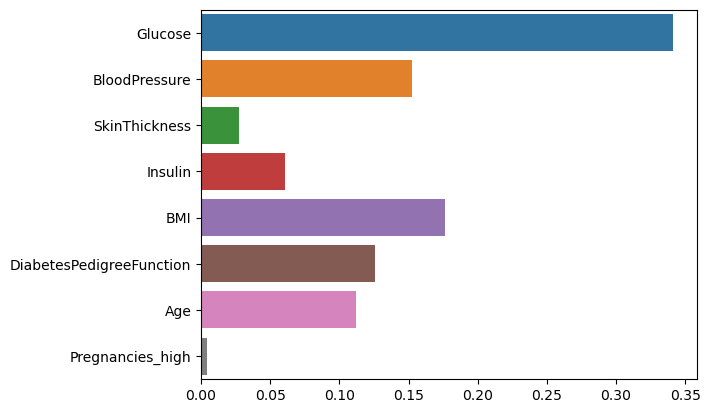

In [21]:
sns.barplot(x=model.feature_importances_, y=feature_names)

In [22]:
y_predict = model.predict(X_test)
y_predict[:5]

array([0, 0, 1, 0, 1], dtype=int64)

In [ ]:
diff_count = abs(y_test-y_predict).sum()
diff_count